<a href="https://colab.research.google.com/github/pkongla478/DSI205_Project_Predicting_Bangkok-_Housing_prices/blob/main/DSI205_Project_Predicting_Bangkok__Housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSI205 Project

## Cleansing 

### Data preparing

In [ ]:
!mkdir ~/.kaggle #create the .kaggle folder in your root directory
!echo '{"username":"thanaraklee","key":"f1566d83d069f15e9ca98da5d782efbc"}' > ~/.kaggle/kaggle.json #write kaggle API credentials to kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # set permissions
!pip install kaggle #install the kaggle library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download thedevastator/predicting-bangkok-condominium-prices-using-web -f df_cleaned_for_ML_regression.csv --force
!unzip /content/df_cleaned_for_ML_regression.csv.zip

  0% 0.00/331k [00:00<?, ?B/s]
100% 331k/331k [00:00<00:00, 69.5MB/s]
unzip:  cannot find or open /content/df_cleaned_for_ML_regression.csv.zip, /content/df_cleaned_for_ML_regression.csv.zip.zip or /content/df_cleaned_for_ML_regression.csv.zip.ZIP.


### Data Cleansing

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import zscore
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/df_cleaned_for_ML_regression.csv')

In [ ]:
df_dummies = pd.get_dummies(df[['district','tran_type1','tran_type2','tran_type3','tran_type4','tran_type5']])
df_new = pd.concat([df, df_dummies], axis=1)
df_cleaned = df_new.drop(columns=['name','district','latitude','longitude','year_built','id','tran_type1','tran_type2','tran_type3','tran_type4','tran_type5','tran_name1','tran_name2','tran_name3','tran_name4','tran_name5',], axis=1)

df_cleaned

,proj_area,nbr_buildings,nbr_floors,units,hospital,price_sqm,bld_age,dist_shop_1,dist_shop_2,dist_shop_3,dist_shop_4,dist_shop_5,dist_school_1,dist_school_2,dist_school_3,dist_school_4,dist_school_5,dist_food_1,dist_food_2,dist_food_3,dist_food_4,dist_food_5,Elevator,Parking,Security,CCTV,Pool,Sauna,Gym,Garden,Playground,Shop,Restaurant,Wifi,dist_tran_1,dist_tran_2,dist_tran_3,dist_tran_4,dist_tran_5,district_Bang Kapi,district_Bang Khae,district_Bang Khen,district_Bang Kho Laem,district_Bang Khun Thian,district_Bang Na,district_Bang Phlat,district_Bang Rak,district_Bang Sue,district_Bangkok Noi,district_Bangkok Yai,district_Bueng Kum,district_Chatuchak,district_Chom Thong,district_Din Daeng,district_Don Mueang,district_Dusit,district_Huai Khwang,district_Khan Na Yao,district_Khlong San,district_Khlong Toei,district_Lak Si,district_Lat Krabang,district_Lat Phrao,district_Min Buri,district_Pathum Wan,district_Phasi Charoen,district_Phaya Thai,district_Phra Khanong,district_Pom Prap Sattru Phai,district_Prawet,district_Rat Burana,district_Ratchathewi,district_Sai Mai,district_Samphanthawong,district_Sathon,district_Suan Luang,district_Taling Chan,district_Thon Buri,district_Wang Thonglang,district_Watthana,district_Yan Nawa,tran_type1_bts,tran_type1_expressway,tran_type1_mrt,tran_type2_bts,tran_type2_expressway,tran_type2_mrt,tran_type3_bts,tran_type3_expressway,tran_type3_mrt,tran_type4_bts,tran_type4_expressway,tran_type4_mrt,tran_type5_bts,tran_type5_expressway,tran_type5_mrt
0,23371,5,5,834.0,2.10,10577,28,1.500,2.100,2.300,2.700,4.300,1.20,1.40,1.50,1.50,1.50,0.48,0.870,1.300,1.300,1.300,0,0,0,1,0,0,0,1,0,1,0,0,4.30,4.80,5.00,8.10,8.30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
1,6476,2,8,471.0,1.80,49059,8,0.400,0.790,0.830,0.850,1.100,0.56,0.72,0.74,0.78,0.83,0.40,0.400,0.590,0.740,0.740,1,1,1,1,0,0,1,1,0,1,1,1,5.80,6.20,6.50,9.80,9.90,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
2,4699,1,16,140.0,2.30,31129,24,0.003,0.003,0.002,0.002,0.910,0.64,0.64,0.73,0.85,0.87,0.30,0.510,0.520,0.530,0.580,1,1,1,1,0,0,0,0,0,1,0,1,2.10,2.50,2.90,6.10,6.30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
3,3816,1,8,270.0,0.68,87368,3,0.002,0.530,0.640,0.640,0.650,0.71,0.72,0.73,0.91,0.92,0.30,0.400,0.520,0.530,0.580,1,1,1,1,1,1,1,0,0,0,0,0,4.70,5.40,6.10,8.50,8.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
4,7391,2,10,560.0,0.69,42597,28,0.002,0.500,0.660,0.710,0.730,0.63,0.74,0.79,0.99,1.00,0.18,0.370,0.500,0.530,0.530,1,1,1,1,0,0,0,0,0,1,0,0,4.70,5.40,6.10,8.50,8.60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,7552,4,20,211.0,3.50,88594,12,3.000,3.000,1.800,1.800,1.800,0.32,1.10,1.20,1.40,1.40,0.38,0.003,0.003,0.003,0.003,1,1,1,1,1,1,1,1,1,0,0,1,1.30,1.60,1.80,3.40,3.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1015,5372,1,19,277.0,1.00,81765,11,2.500,2.800,3.000,8.800,9.900,0.74,0.80,1.20,1.50,1.70,0.29,0.009,0.002,0.850,0.004,1,1,1,1,1,1,1,1,0,0,0,0,2.50,2.90,2.90,6.40,6.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
1016,10832,1,33,1685.0,3.80,83746,6,0.003,0.003,0.003,0.003,0.003,0.72,0.72,0.72,0.72,0.72,0.24,0.240,0.240,0.240,0.240,1,1,1,1,1,0,1,1,0,0,0,0,0.62,0.62,0

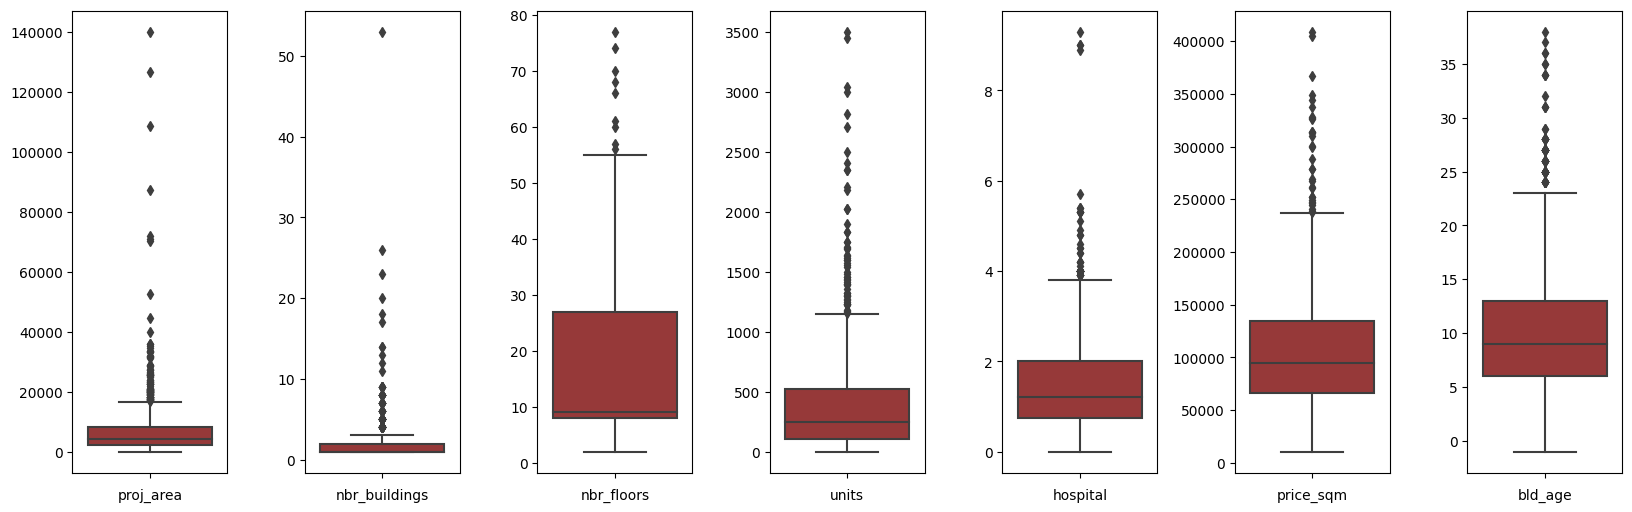

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(20, 6))
plt.subplots_adjust(wspace=0.5)

sns.boxplot(data=df_cleaned['proj_area'], ax=ax[0], color='brown',)
ax[0].set_xlabel('proj_area')

sns.boxplot(data=df_cleaned['nbr_buildings'], ax=ax[1], color='brown',)
ax[1].set_xlabel('nbr_buildings')

sns.boxplot(data=df_cleaned['nbr_floors'], ax=ax[2], color='brown',)
ax[2].set_xlabel('nbr_floors')

sns.boxplot(data=df_cleaned['units'], ax=ax[3], color='brown',)
ax[3].set_xlabel('units')

sns.boxplot(data=df_cleaned['hospital'], ax=ax[4], color='brown',)
ax[4].set_xlabel('hospital')

sns.boxplot(data=df_cleaned['price_sqm'], ax=ax[5], color='brown',)
ax[5].set_xlabel('price_sqm')

sns.boxplot(data=df_cleaned['bld_age'], ax=ax[6], color='brown',)
ax[6].set_xlabel('bld_age')

for subplot in ax:
    subplot.set_xticklabels([])


In [ ]:
df_no_outliers = df_cleaned.copy()

columns = ['proj_area','nbr_buildings','nbr_floors','units','hospital','price_sqm','bld_age']

for col in columns:
    q3 = df_cleaned[col].quantile(0.75)
    q1 = df_cleaned[col].quantile(0.25)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    df_iqr_round_1 = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]
    df_iqr_round_1 = df_iqr_round_1.dropna()
    while True:
        q1_verify = df_iqr_round_1[col].quantile(0.25)
        q3_verify = df_iqr_round_1[col].quantile(0.75)
        iqr_verify = q3_verify - q1_verify
        upper_verify = q3_verify + 1.5 * iqr_verify
        lower_verify = q1_verify - 1.5 * iqr_verify
        df_iqr_round_2 = df_iqr_round_1[(df_iqr_round_1[col] >= lower_verify) & (df_iqr_round_1[col] <= upper_verify)]
        df_iqr_round_2 = df_iqr_round_2.dropna()
        
        ##if verify using z score
        # std = 3
        # z_scores = zscore(df_iqr_round_2[col])
        # df_z_score = df_iqr_round_2[(z_scores < std) & (z_scores > -std)]
        # df_z_score = df_z_score.dropna()

        if len(df_iqr_round_2[col]) == len(df_iqr_round_1[col]):
            print(f'column: {col} ,  befor clean outlier = {len(df_cleaned[col])} rows ,   after clean {len(df_iqr_round_2[col])} rows')
            df_no_outliers[col]= df_iqr_round_2[col]
            break
        else:
            df_iqr_round_1 = df_iqr_round_2
            
df_no_outliers = df_no_outliers.dropna()

column: proj_area ,  befor clean outlier = 1019 rows ,   after clean 873 rows
column: nbr_buildings ,  befor clean outlier = 1019 rows ,   after clean 902 rows
column: nbr_floors ,  befor clean outlier = 1019 rows ,   after clean 1010 rows
column: units ,  befor clean outlier = 1019 rows ,   after clean 941 rows
column: hospital ,  befor clean outlier = 1019 rows ,   after clean 959 rows
column: price_sqm ,  befor clean outlier = 1019 rows ,   after clean 972 rows
column: bld_age ,  befor clean outlier = 1019 rows ,   after clean 865 rows


<Axes: >

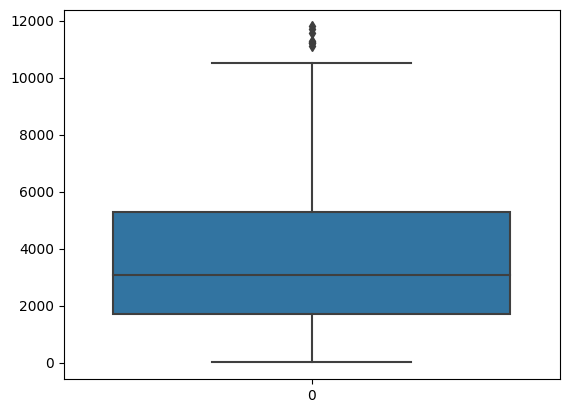

In [ ]:
sns.boxplot(data=df_no_outliers['proj_area'].values)

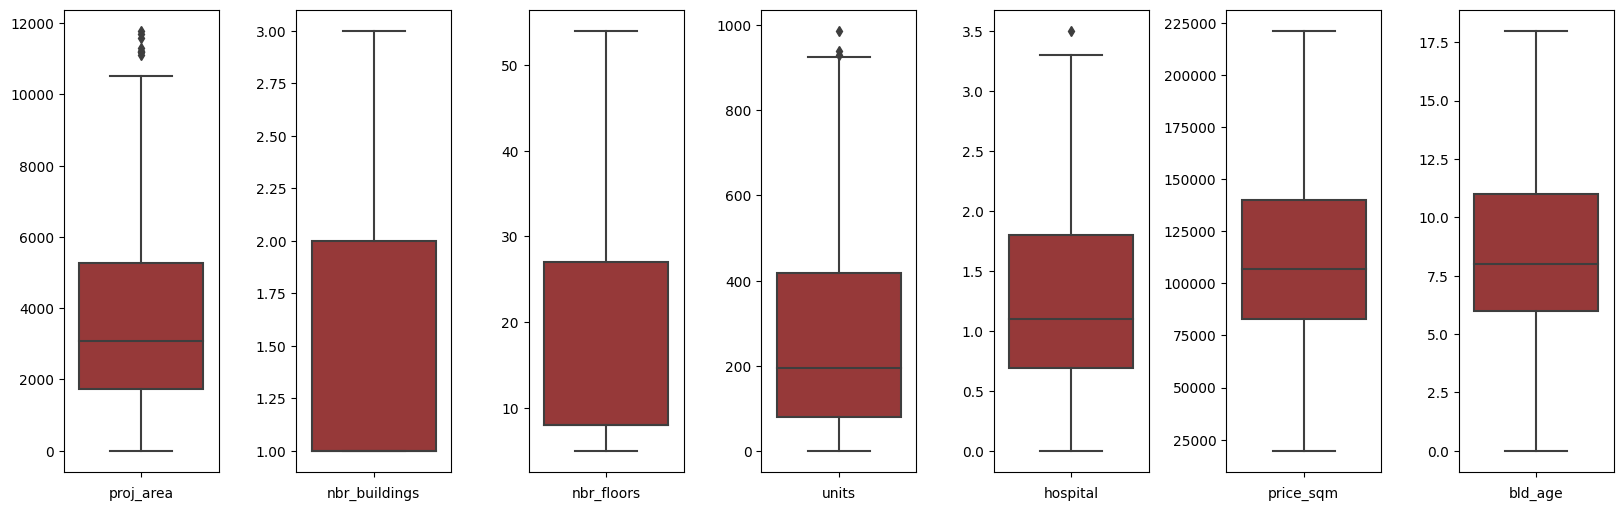

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(20, 6))
plt.subplots_adjust(wspace=0.5)

sns.boxplot(data=df_no_outliers['proj_area'].values, ax=ax[0], color='brown',)
ax[0].set_xlabel('proj_area')

sns.boxplot(data=df_no_outliers['nbr_buildings'].values, ax=ax[1], color='brown',)
ax[1].set_xlabel('nbr_buildings')

sns.boxplot(data=df_no_outliers['nbr_floors'].values, ax=ax[2], color='brown',)
ax[2].set_xlabel('nbr_floors')

sns.boxplot(data=df_no_outliers['units'].values, ax=ax[3], color='brown',)
ax[3].set_xlabel('units')

sns.boxplot(data=df_no_outliers['hospital'].values, ax=ax[4], color='brown',)
ax[4].set_xlabel('hospital')

sns.boxplot(data=df_no_outliers['price_sqm'].values, ax=ax[5], color='brown',)
ax[5].set_xlabel('price_sqm')

sns.boxplot(data=df_no_outliers['bld_age'].values, ax=ax[6], color='brown',)
ax[6].set_xlabel('bld_age')

for subplot in ax:
    subplot.set_xticklabels([])
    

## Model


### Setup

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,LinearRegression,Lasso,ElasticNet
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = df_no_outliers.copy()

In [ ]:
df['price'] = df['proj_area'] * df['price_sqm']
df.drop(columns = 'price_sqm', inplace= True)

In [ ]:
X = df.drop(columns = "price")
y = df['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, shuffle=True, random_state = 2023)

In [ ]:
results = []
preds = []
train_preds = []
def evaluate(model, y_pred, train_pred):
  """
  param:

  model = Model name
  y_pred = predicted y from x test
  train_pred = predicted y from x train


  return:
  
  collect result in results 
  collect prediction result in preds

  result = Dataframe that has Model name, R2 Score, MAE, MSE, RMSE as columns
  preds = Dataframe that as Model name, Y Test, Y Predict, Y Train Predict, Y Train as column  

  """
  for x in y_pred:
    q75,q25 = np.percentile(y_pred,[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    y_pred[y_pred < min] = np.median(y_pred)
    y_pred[y_pred > max] = np.median(y_pred)

  matrices = ['R2 Score','MAE','MSE','RMSE']
  r2 = r2_score(y_test, y_pred.astype(int))
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse= np.sqrt(mse)

  r2_t = r2_score(y_train, train_pred.astype(int))
  mae_t = mean_absolute_error(y_train, train_pred)
  mse_t = mean_squared_error(y_train, train_pred)
  rmse_t = np.sqrt(mse)

  result = pd.DataFrame({"Model":model, "Matrices": matrices, "Score":[r2,mae,mse,rmse],"Train Score":[r2_t,mae_t,mse_t,rmse_t]})
  pred_test = pd.DataFrame({"Model":model,"Y Test":y_test,"Y Predict":y_pred })
  pred_train = pd.DataFrame({"Model":model,"Y Train ":y_train,"Y Train Predict":train_pred})


  
  results.append(result)
  preds.append(pred_test)
  train_preds.append(pred_train)
  return result, pred_test, pred_train

In [ ]:
def compare(train,test):
    name = str(train['Model'].unique()[0])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,5))
    fig.suptitle(name)
    
    ax1.set_title('Train')
    ax1.scatter(range(len(train.iloc[:,1])),train.iloc[:,1], label='Actual Values',color='g')
    ax1.plot(train.iloc[:,2], label='Predicted Values',color='r')
    
    ax2.set_title('Test')
    ax2.scatter(range(len(test.iloc[:,1])),test.iloc[:,1], label='Actual Values',color='g')
    ax2.plot(test.iloc[:,2], label='Predicted Values',color='r')
    # set labels and title
    plt.xlabel('Data Points')
    plt.ylabel('Values')


    # add legend
    plt.legend()

    # display the plot
    return plt.show()

In [ ]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

### Multiple Linear Regression

In [ ]:
LinearReg = LinearRegression()

LinearReg.fit(X_train_scaled, y_train)
y_pred = LinearReg.predict(X_test_scaled)
train_pred = LinearReg.predict(X_train_scaled)

In [ ]:
result, pred_test, pred_train = evaluate("Linear Regression", y_pred, train_pred)

In [ ]:
coefficients = LinearReg.coef_
intercept = LinearReg.intercept_

feature_names = X_train.columns

print('y = {:.2f}'.format(intercept), end='')
for i in range(len(coefficients)):
    print(' + ({:.2f} x {})'.format(coefficients[i], feature_names[i]), end='')
print()

y = 407119059.42 + (248887212.09 x proj_area) + (12662110.87 x nbr_buildings) + (66198455.35 x nbr_floors) + (-33339817.39 x units) + (-1737375.14 x hospital) + (-41288472.76 x bld_age) + (-1284916.82 x dist_shop_1) + (805295.05 x dist_shop_2) + (5811176.99 x dist_shop_3) + (14607649.98 x dist_shop_4) + (-2666946.75 x dist_shop_5) + (-8590449.86 x dist_school_1) + (-14072485.92 x dist_school_2) + (16063685.12 x dist_school_3) + (-9077387.34 x dist_school_4) + (-246870.23 x dist_school_5) + (-7217079.60 x dist_food_1) + (-1941535.83 x dist_food_2) + (-1947954.67 x dist_food_3) + (4389898.87 x dist_food_4) + (-5962079.60 x dist_food_5) + (-16508150.81 x Elevator) + (12196963.25 x Parking) + (-502003.85 x Security) + (-2651112580686649856.00 x CCTV) + (19106584.94 x Pool) + (-2350460.32 x Sauna) + (-240976.73 x Gym) + (4048420.61 x Garden) + (-389139.20 x Playground) + (12646134.12 x Shop) + (-11744076.82 x Restaurant) + (1099196.14 x Wifi) + (-41509632.00 x dist_tran_1) + (6355328.00 x d

In [ ]:
result

,Model,Matrices,Score,Train Score
0,Linear Regression,R2 Score,7.149684e-01,8.798760e-01
1,Linear Regression,MAE,1.055100e+08,7.640698e+07
2,Linear Regression,MSE,2.752071e+16,1.094799e+16
3,Linear Regression,RMSE,1.658937e+08,1.658937e+08


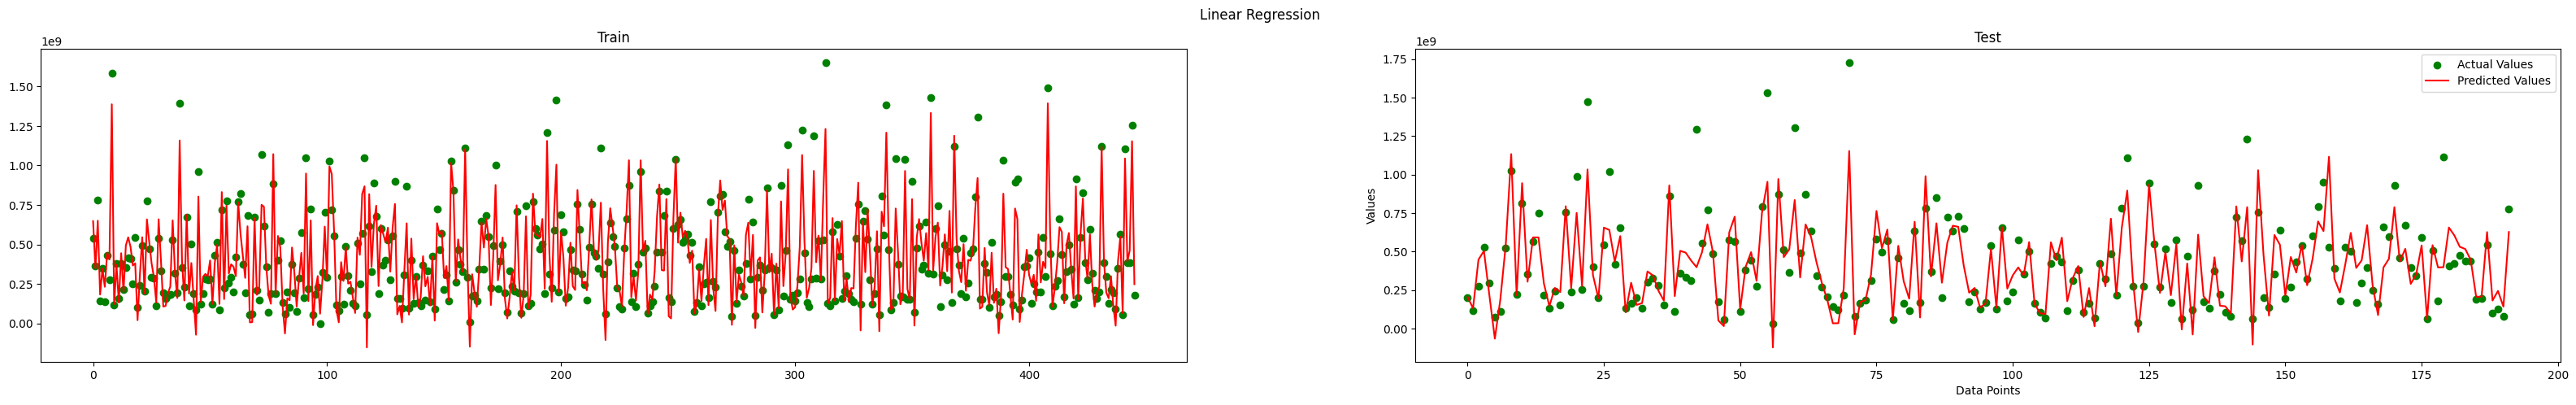

In [ ]:
compare(pred_train,pred_test)

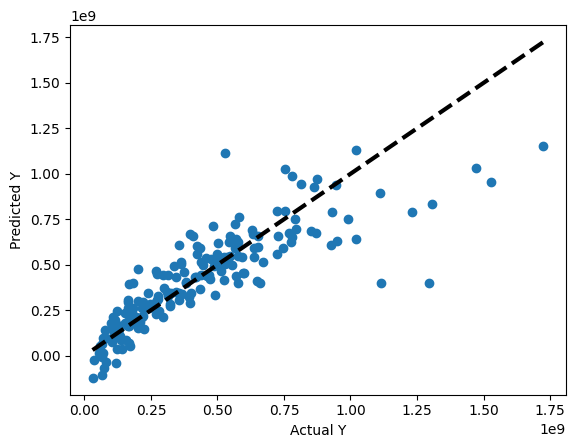

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.show()

### Lasso Regression

In [ ]:
lassoReg = Lasso()
params = {'alpha':[0.00001,0.0001, 0.001, 0.01, 0.1, 1,10,100,1000,10000,100000,1000000,10000000,100000000], 'max_iter':[10000], 'tol':[1e-2]}

search = GridSearchCV(lassoReg, param_grid=params, cv=7)
search.fit(X_train_scaled, y_train)
y_pred = search.predict(X_test_scaled)
train_pred = search.predict(X_train_scaled)


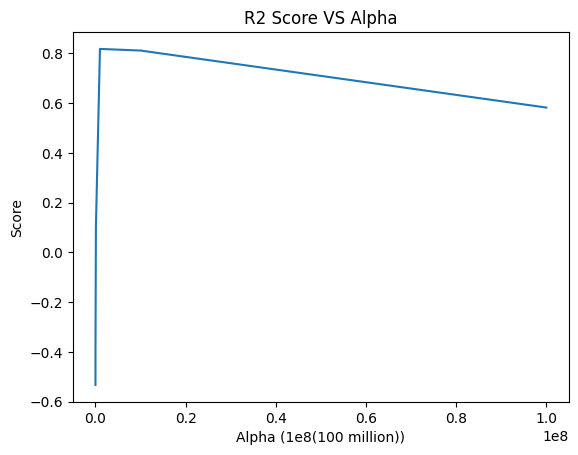

best alpha : 1000000


In [ ]:
cv_results = search.cv_results_

alphas = cv_results['param_alpha'].data.astype(float)
scores = cv_results['mean_test_score']

plt.plot(alphas, scores)
plt.title('R2 Score VS Alpha')
plt.xlabel('Alpha (1e8(100 million))')
plt.ylabel('Score')
plt.show()
print('best alpha :',search.best_params_['alpha'])

In [ ]:
result, pred_test, pred_train = evaluate("Lasso Regression", y_pred, train_pred)

In [ ]:
result

,Model,Matrices,Score,Train Score
0,Lasso Regression,R2 Score,7.205954e-01,8.781890e-01
1,Lasso Regression,MAE,1.028501e+08,7.652909e+07
2,Lasso Regression,MSE,2.697741e+16,1.110174e+16
3,Lasso Regression,RMSE,1.642480e+08,1.642480e+08


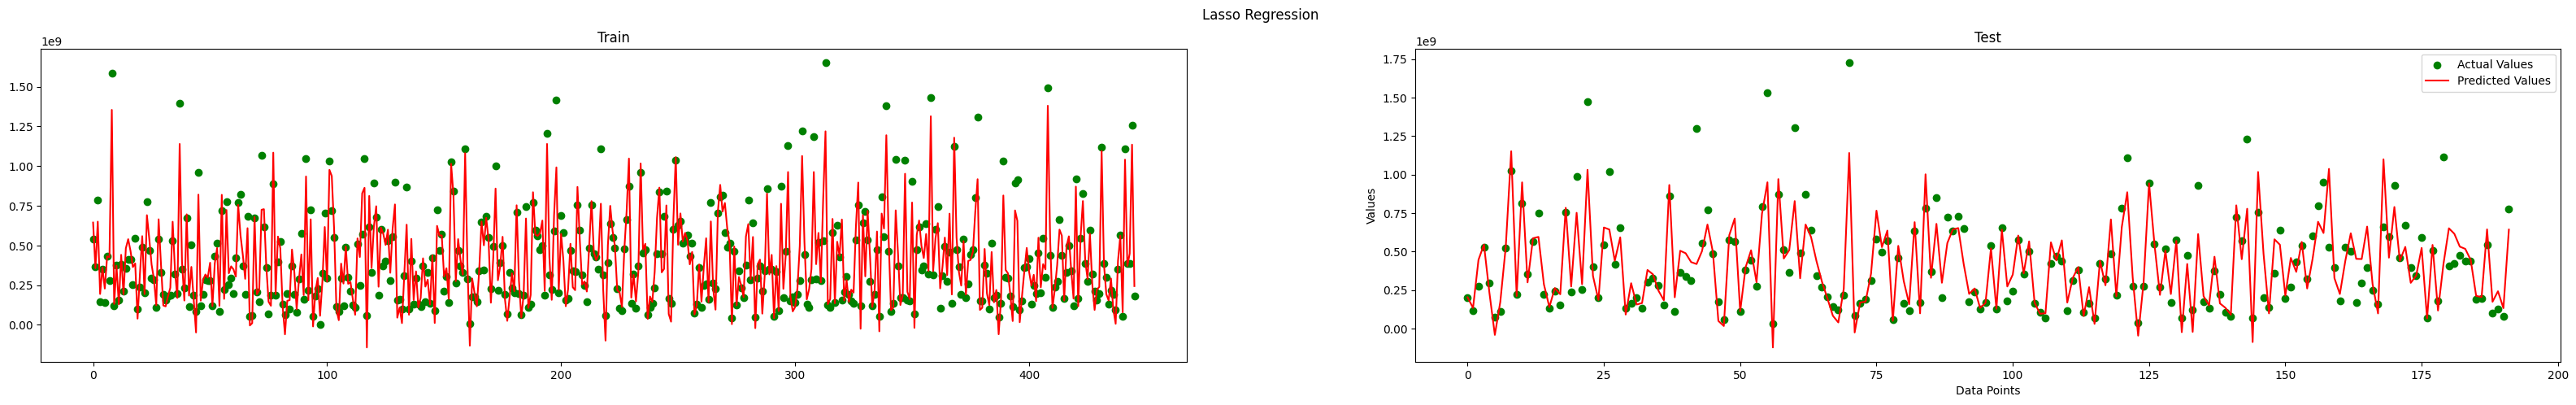

In [ ]:
compare(pred_train, pred_test)

In [ ]:
best_lasso = search.best_estimator_
intercept = best_lasso.intercept_
coefficients = best_lasso.coef_
alpha = best_lasso.alpha

formula = 'y = {:.2f}'.format(intercept)
for i, coef in enumerate(coefficients):
    formula += ' + {:.2f}*x{}'.format(coef, i+1)
    
formula += ' + {:.2f}* L1 penalty'.format(alpha)
    
print(formula,'\nwhere \n - L1 penalty = alpha * ||β|| \n - β = vector of coefficients \n - alpha = regularization parameter')

y = 407148120.78 + 245136353.95*x1 + 10900126.27*x2 + 63711084.21*x3 + -29208875.27*x4 + -1569194.05*x5 + -39183393.70*x6 + -0.00*x7 + 164628.24*x8 + 5197887.17*x9 + 11340871.52*x10 + -0.00*x11 + -8774545.91*x12 + -1819512.23*x13 + 1220171.80*x14 + -0.00*x15 + -3120062.91*x16 + -7950546.96*x17 + -1029422.32*x18 + -403292.07*x19 + 1289964.58*x20 + -3461585.17*x21 + -13335382.74*x22 + 8811490.77*x23 + -0.00*x24 + 0.00*x25 + 16307560.91*x26 + -0.00*x27 + 0.00*x28 + 4390225.51*x29 + 0.00*x30 + 8325922.72*x31 + -8328147.67*x32 + 0.00*x33 + -35406897.38*x34 + -118362.79*x35 + -10351044.89*x36 + 0.00*x37 + 0.00*x38 + -6925284.78*x39 + 10349984.36*x40 + -3284908.87*x41 + -0.00*x42 + 0.00*x43 + -23225170.30*x44 + 0.00*x45 + 11763554.34*x46 + -15144972.05*x47 + -5949773.55*x48 + -9975517.48*x49 + -5917613.87*x50 + -6631916.55*x51 + -4035995.79*x52 + -12176340.60*x53 + 0.00*x54 + 0.00*x55 + 2508122.05*x56 + 0.00*x57 + -8284546.78*x58 + 20581199.91*x59 + 0.00*x60 + 0.00*x61 + -11244600.30*x62 + 0.

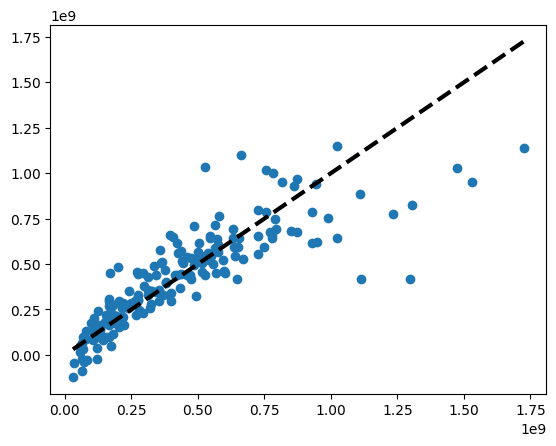

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.show()

### Ridge Regression

In [ ]:
ridgeReg = Ridge()
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1, 1,10,100,1000], 'max_iter':[10000], 'tol':[1e-2]}

search = GridSearchCV(ridgeReg, param_grid=params, cv=6)
search.fit(X_train_scaled, y_train)
y_pred = search.predict(X_test_scaled)
train_pred = search.predict(X_train_scaled)

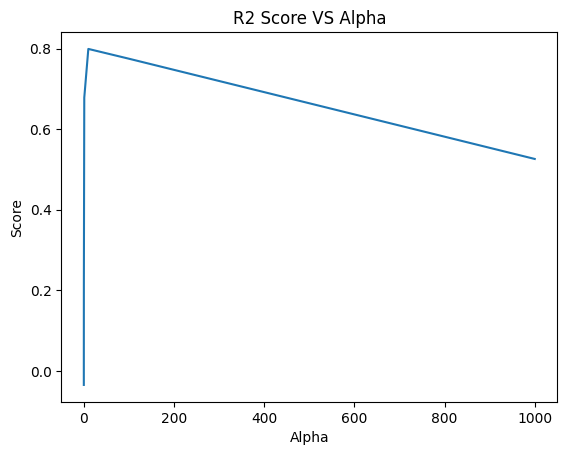

best alpha : 10


In [ ]:
cv_results = search.cv_results_

alphas = cv_results['param_alpha'].data.astype(float)
scores = cv_results['mean_test_score']

plt.plot(alphas, scores)
plt.title('R2 Score VS Alpha')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.show()
print('best alpha :',search.best_params_['alpha'])

In [ ]:
result, pred_test, pred_train = evaluate("Ridge Regression", y_pred, train_pred)

In [ ]:
result

,Model,Matrices,Score,Train Score
0,Ridge Regression,R2 Score,7.142563e-01,8.787202e-01
1,Ridge Regression,MAE,1.043099e+08,7.664540e+07
2,Ridge Regression,MSE,2.758947e+16,1.105332e+16
3,Ridge Regression,RMSE,1.661008e+08,1.661008e+08


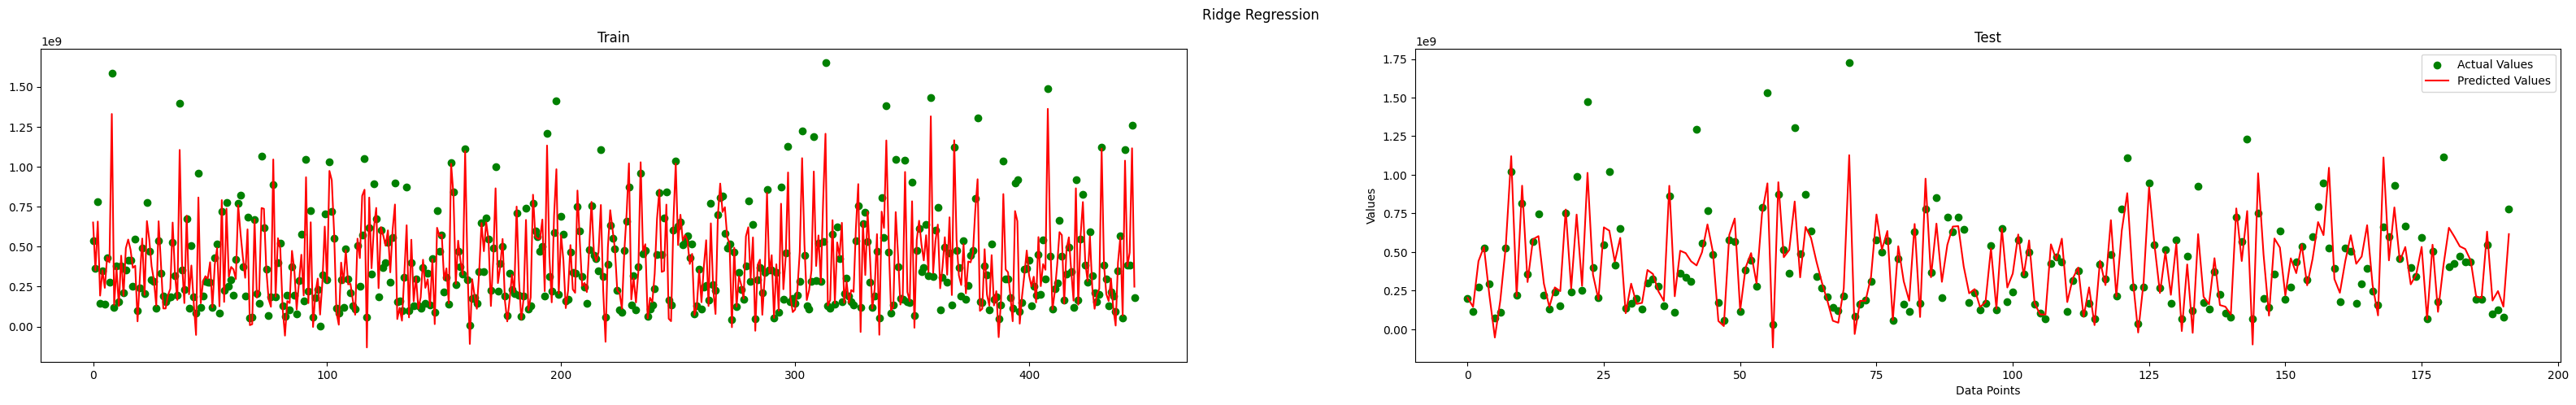

In [ ]:
compare(pred_train, pred_test)

In [ ]:
best_ridge = search.best_estimator_
intercept = best_ridge.intercept_
coefficients = best_ridge.coef_
alpha = best_ridge.alpha

formula = 'y = {:.2f}'.format(intercept)
for i, coef in enumerate(coefficients):
    formula += ' + {:.2f}*x{}'.format(coef, i+1)
    
formula += ' + {:.2f} * L2 penalty'.format(alpha)
    
print(formula,'\nwhere \n - L2 penalty = β^2 \n - β = vector of coefficients \n - alpha = regularization parameter')


y = 407148120.78 + 234076710.61*x1 + 14767646.26*x2 + 65630529.74*x3 + -23373284.33*x4 + -2562017.08*x5 + -38515302.56*x6 + -804430.26*x7 + 1738234.07*x8 + 6237045.31*x9 + 14223349.89*x10 + -2342153.97*x11 + -9118623.22*x12 + -10274028.17*x13 + 9193497.44*x14 + -5162480.19*x15 + -1366714.90*x16 + -6592387.99*x17 + -1996111.23*x18 + -1768408.48*x19 + 3310843.78*x20 + -5073929.93*x21 + -15114255.51*x22 + 11632561.72*x23 + -790479.92*x24 + 0.00*x25 + 17946697.40*x26 + -1357883.63*x27 + 330324.00*x28 + 6213387.92*x29 + 270120.69*x30 + 10901652.12*x31 + -10659304.32*x32 + 1099569.95*x33 + -33924483.47*x34 + -2481723.14*x35 + -13860381.77*x36 + 7743233.60*x37 + 5703453.09*x38 + -9702685.92*x39 + 10572687.48*x40 + -6713297.97*x41 + -60644.44*x42 + 0.00*x43 + -22592963.46*x44 + 144373.35*x45 + 12777787.53*x46 + -15650395.16*x47 + -7469252.89*x48 + -12010693.60*x49 + -8928626.53*x50 + -6353939.74*x51 + -5295183.47*x52 + -13047734.63*x53 + 0.00*x54 + 0.00*x55 + 3559919.80*x56 + -1128314.27*x57 +

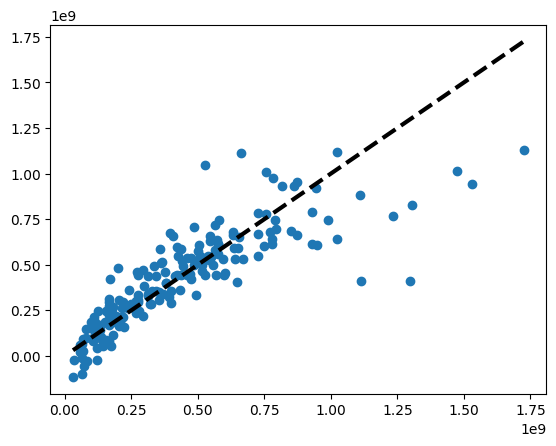

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.show()

### Elastic Net

In [ ]:
elasticNet = ElasticNet()
params = {'alpha':np.linspace(0.1, 0.5, 10),'l1_ratio':np.linspace(0.1, 0.9, 10) ,'max_iter':[10000], 'tol':[1e-2]}

search = GridSearchCV(elasticNet, param_grid=params, cv=6)
search.fit(X_train_scaled, y_train)
y_pred = search.predict(X_test_scaled)
train_pred = search.predict(X_train_scaled)

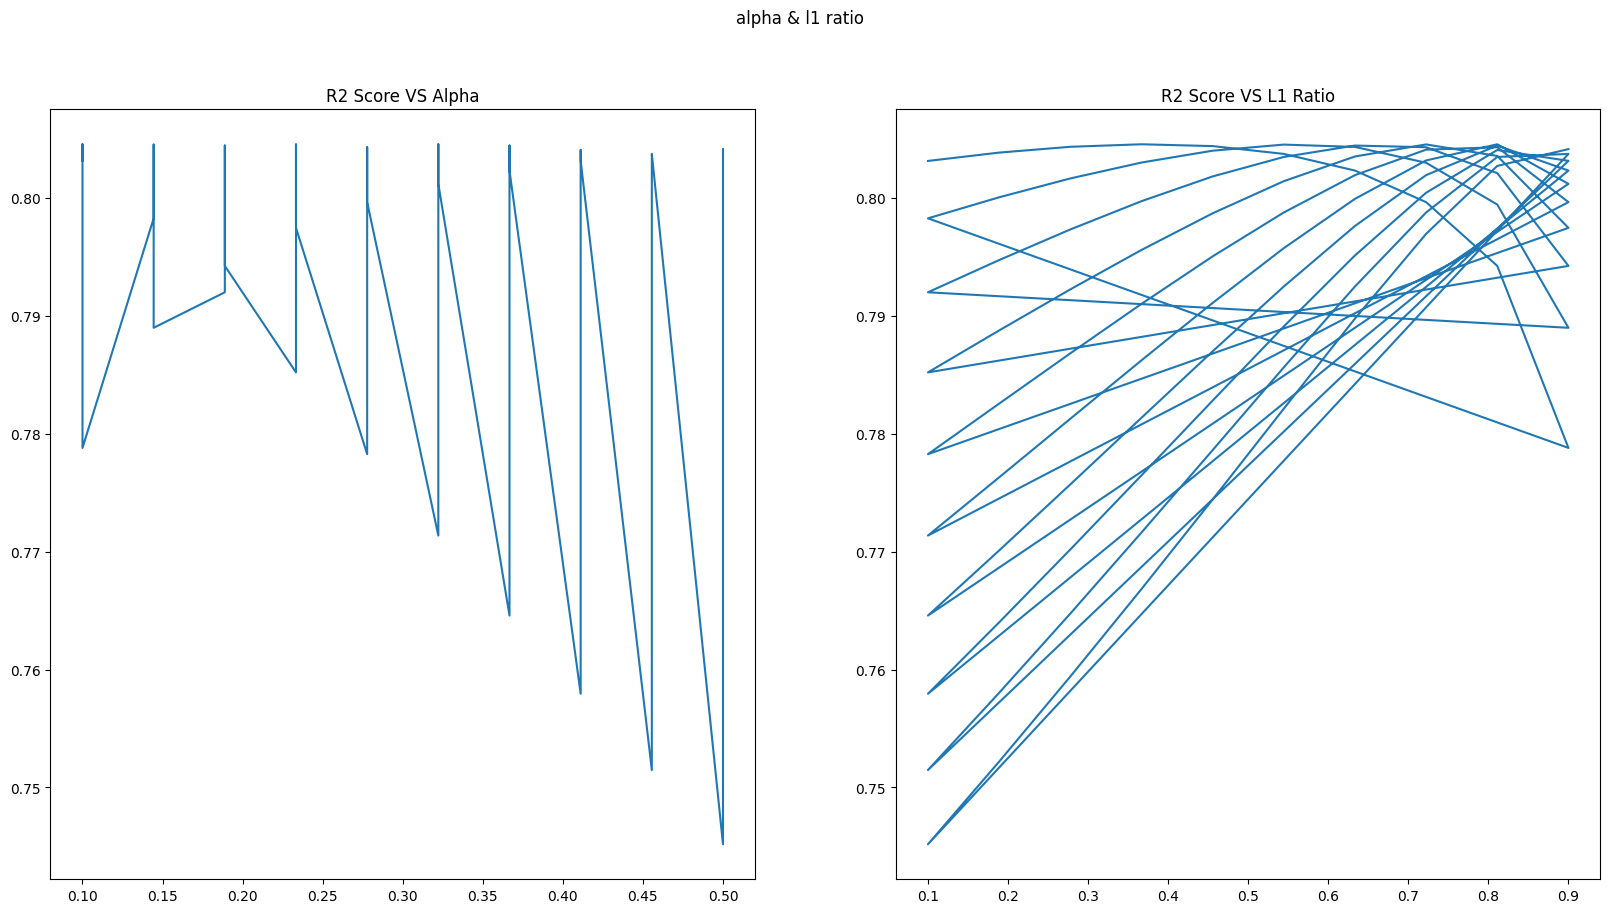

best alpha : 0.100 
best l1 ratio: 0.367


In [ ]:
cv_results = search.cv_results_

alphas = cv_results['param_alpha'].data.astype(float)
l1_ratio = cv_results['param_l1_ratio'].data.astype(float)
scores = cv_results['mean_test_score']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('alpha & l1 ratio')
ax1.plot(alphas, scores)
ax1.set_title('R2 Score VS Alpha')

ax2.plot(l1_ratio, scores)
ax2.set_title('R2 Score VS L1 Ratio')

plt.show()
print('best alpha : {:.3f}'.format(search.best_params_['alpha']),"\nbest l1 ratio: {:.3f}".format(search.best_params_['l1_ratio']))

In [ ]:
result, pred_test, pred_train = evaluate("Elastic Net", y_pred, train_pred)

In [ ]:
result

,Model,Matrices,Score,Train Score
0,Elastic Net,R2 Score,7.121436e-01,8.732433e-01
1,Elastic Net,MAE,1.043651e+08,7.758304e+07
2,Elastic Net,MSE,2.779345e+16,1.155249e+16
3,Elastic Net,RMSE,1.667137e+08,1.667137e+08


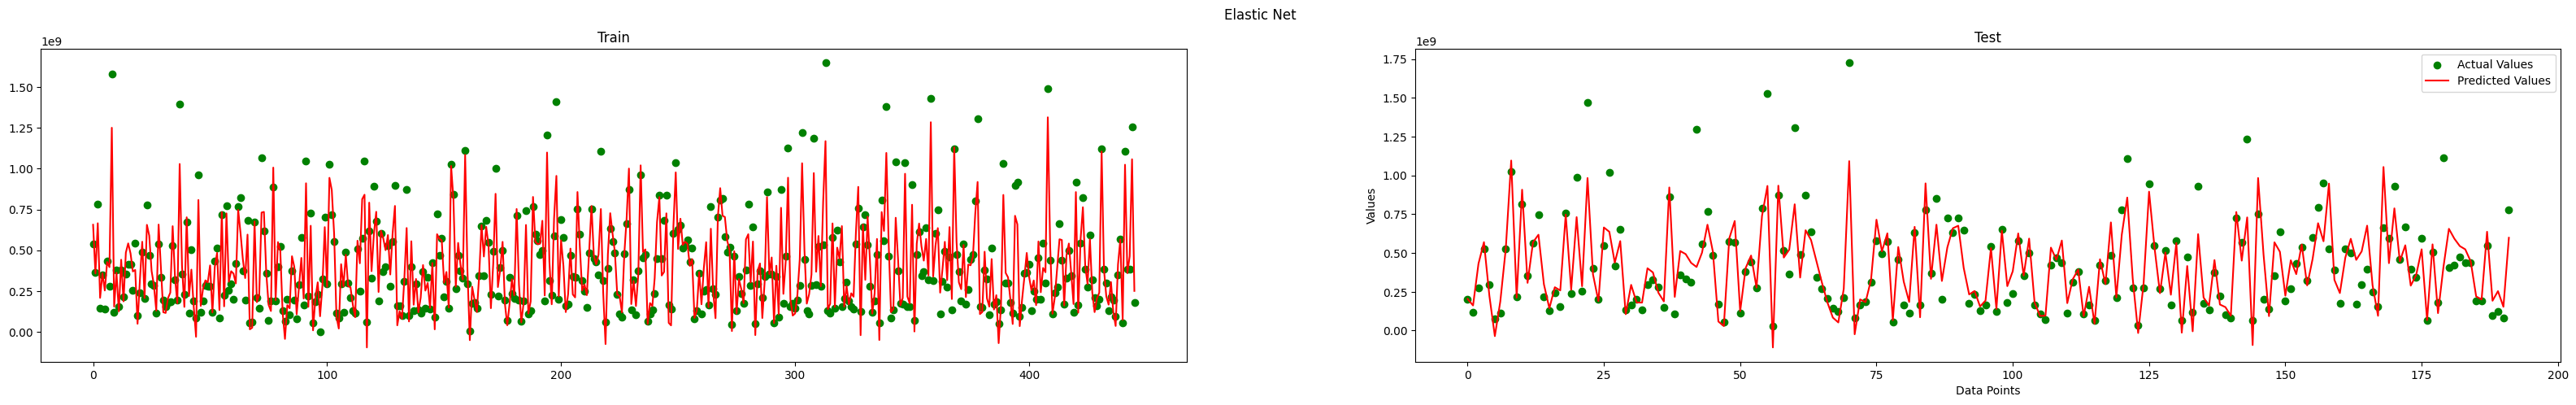

In [ ]:
compare(pred_train, pred_test)

In [ ]:
best_elastic = search.best_estimator_
intercept = best_elastic.intercept_
coefficients = best_elastic.coef_
alpha = best_elastic.alpha
l1_ratio = best_elastic.l1_ratio

formula = 'y = {:.2f}'.format(intercept)
for i, coef in enumerate(coefficients):
    formula += ' + {:.2f}*x{}'.format(coef, i+1)
    
formula += ' + {:.2f}*(({:.3f}* L1 penalty)+(1-{:.3f}) * L2 penalty)'.format(alpha,l1_ratio,l1_ratio,l1_ratio)
    
print(formula,'\nwhere \n - L1 penalty = ||β|| \n - L2 penalty = β^2 \n - β = vector of coefficients \n - alpha = regularization parameter \n - l1 ratio = parameter that controls the balance between the L1 and L2')


y = 407148120.78 + 212560687.19*x1 + 17793269.67*x2 + 64507391.01*x3 + -9896724.12*x4 + -3665281.06*x5 + -34766755.36*x6 + -209142.55*x7 + 3092382.44*x8 + 6801743.70*x9 + 13734549.70*x10 + -1865502.82*x11 + -9316771.61*x12 + -7686502.37*x13 + 3418337.22*x14 + -2498035.06*x15 + -1811178.83*x16 + -5387442.50*x17 + -2476199.52*x18 + -1783712.80*x19 + 1655208.32*x20 + -3903628.86*x21 + -12903036.70*x22 + 10689717.99*x23 + -1248833.83*x24 + 0.00*x25 + 16553612.74*x26 + 181957.67*x27 + 1234150.10*x28 + 9127584.75*x29 + 1394087.18*x30 + 8873494.63*x31 + -9248777.30*x32 + 1123283.47*x33 + -27299363.27*x34 + -6972017.30*x35 + -12359035.28*x36 + 4398927.53*x37 + 3303969.45*x38 + -7526949.30*x39 + 9629464.79*x40 + -5217909.86*x41 + 861727.42*x42 + 0.00*x43 + -21997357.44*x44 + 214458.59*x45 + 10439572.57*x46 + -15799669.72*x47 + -4971082.76*x48 + -11026104.81*x49 + -7335322.12*x50 + -6438088.04*x51 + -4065875.68*x52 + -13237544.63*x53 + 0.00*x54 + 0.00*x55 + 3926285.65*x56 + 1524790.08*x57 + -749

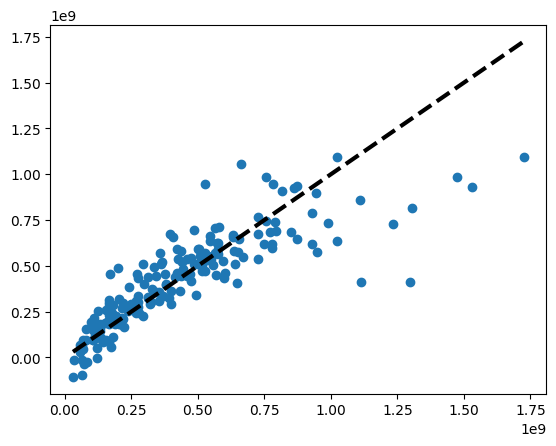

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.show()

### Results

In [ ]:
all_res = pd.concat(results)
scores = all_res.loc[all_res["Matrices"] == "MAE", :].sort_values('Score')
scores

,Model,Matrices,Score,Train Score
1,Lasso Regression,MAE,1.028501e+08,7.652909e+07
1,Ridge Regression,MAE,1.043099e+08,7.664540e+07
1,Elastic Net,MAE,1.043651e+08,7.758304e+07
1,Linear Regression,MAE,1.055100e+08,7.640698e+07


In [ ]:
all_preds = pd.concat(preds)
all_trains = pd.concat(train_preds)

In [ ]:
all_preds['Y Predict'] = all_preds['Y Predict'].astype(int)
all_trains['Y Train Predict'] = all_trains['Y Train Predict'].astype(int)

In [ ]:
scores

,Model,Matrices,Score,Train Score
1,Lasso Regression,MAE,1.028501e+08,7.652909e+07
1,Ridge Regression,MAE,1.043099e+08,7.664540e+07
1,Elastic Net,MAE,1.043651e+08,7.758304e+07
1,Linear Regression,MAE,1.055100e+08,7.640698e+07


In [ ]:
scores.loc[scores["Model"] == "Linear Regression", "Score"].values.tolist()[0]

105509985.95099735

In [ ]:
def plotting(axe, model,test):
  if test == True:
    score_is = "Score"
    df = all_preds
  else:
    score_is = "Train Score"
    df = all_trains
  score = scores.loc[scores["Model"] == model, score_is]
  tab = df.loc[df['Model'] == model, :]
  axe.set_title("{} (MAE = {:.3f})".format(model,score.values.tolist()[0]))
  axe.scatter(range(len(tab.iloc[:,1])), tab.iloc[:,1], label='Actual Values',color='g')
  axe.plot(tab.iloc[:,2], label='Predicted Values',color='r')
 

* Y Test VS Y Prediction

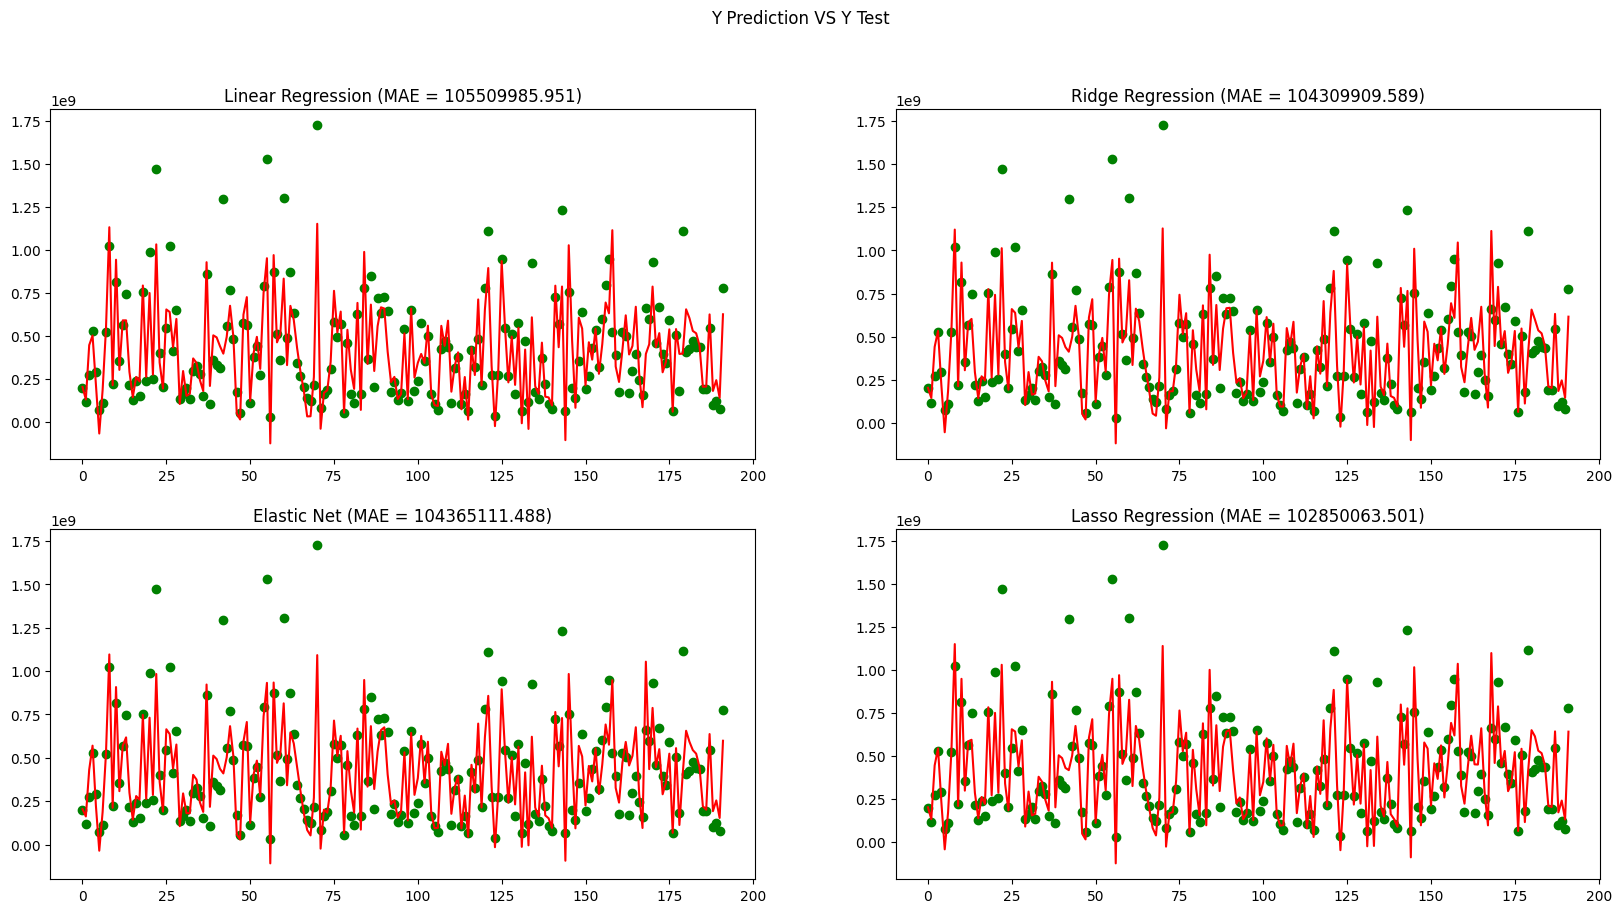

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle("Y Prediction VS Y Test")
plotting(axs[0,0], "Linear Regression",True)
plotting(axs[0,1], "Ridge Regression",True)
plotting(axs[1,0], "Elastic Net",True)
plotting(axs[1,1], "Lasso Regression",True)

In [ ]:
all_res.pivot_table(index="Model",columns='Matrices',values="Score").sort_values('MAE')

Matrices,MAE,MSE,R2 Score,RMSE
Model,,,,
Lasso Regression,1.028501e+08,2.697741e+16,0.720595,1.642480e+08
Ridge Regression,1.043099e+08,2.758947e+16,0.714256,1.661008e+08
Elastic Net,1.043651e+08,2.779345e+16,0.712144,1.667137e+08
Linear Regression,1.055100e+08,2.752071e+16,0.714968,1.658937e+08


From visualization & table **MAE** can tell acuracy this data

* Y Train VS Train Prediction 

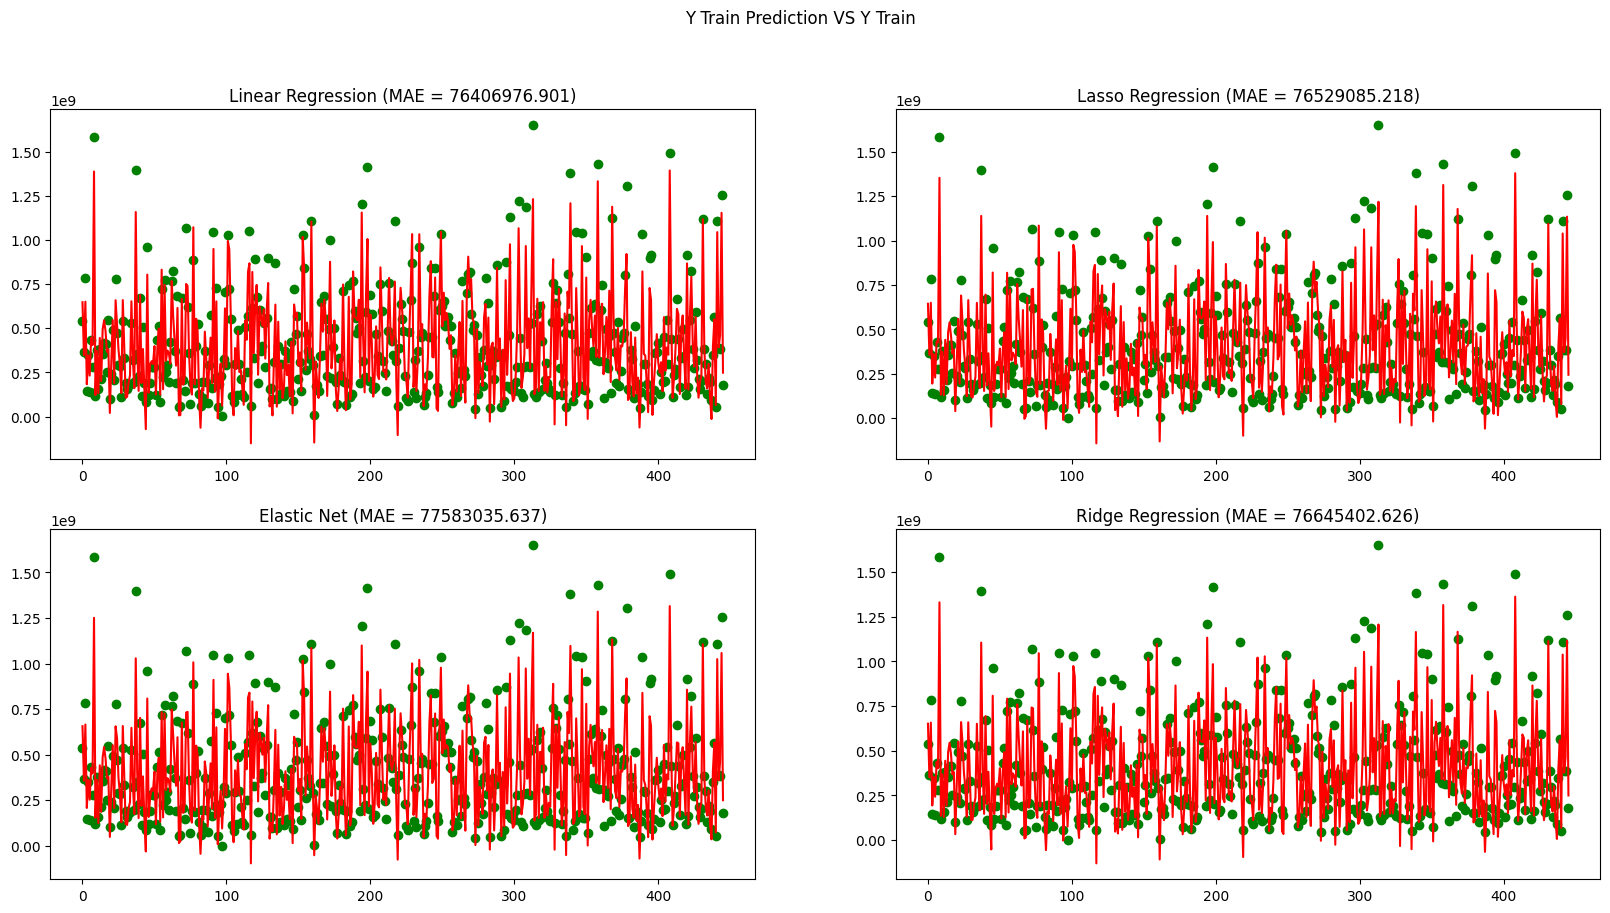

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle("Y Train Prediction VS Y Train")
plotting(axs[0,0], "Linear Regression",False)
plotting(axs[0,1], "Lasso Regression",False)
plotting(axs[1,0], "Elastic Net",False)
plotting(axs[1,1], "Ridge Regression",False)


In [ ]:
all_res.pivot_table(index="Model",columns='Matrices',values="Train Score")

Matrices,MAE,MSE,R2 Score,RMSE
Model,,,,
Elastic Net,7.758304e+07,1.155249e+16,0.873243,1.667137e+08
Lasso Regression,7.652909e+07,1.110174e+16,0.878189,1.642480e+08
Linear Regression,7.640698e+07,1.094799e+16,0.879876,1.658937e+08
Ridge Regression,7.664540e+07,1.105332e+16,0.878720,1.661008e+08


Overall

In [ ]:
all_res.melt(id_vars=["Model","Matrices"]).pivot_table(index=["variable","Model"],values='value',columns='Matrices')

Matrices                                MAE           MSE  R2 Score  \
variable    Model                                                     
Score       Elastic Net        1.043651e+08  2.779345e+16  0.712144   
            Lasso Regression   1.028501e+08  2.697741e+16  0.720595   
            Linear Regression  1.055100e+08  2.752071e+16  0.714968   
            Ridge Regression   1.043099e+08  2.758947e+16  0.714256   
Train Score Elastic Net        7.758304e+07  1.155249e+16  0.873243   
            Lasso Regression   7.652909e+07  1.110174e+16  0.878189   
            Linear Regression  7.640698e+07  1.094799e+16  0.879876   
            Ridge Regression   7.664540e+07  1.105332e+16  0.878720   

Matrices                               RMSE  
variable    Model                            
Score       Elastic Net        1.667137e+08  
            Lasso Regression   1.642480e+08  
            Linear Regression  1.658937e+08  
            Ridge Regression   1.661008e+08  
Train Score Elastic Net        1.667137e+08  
            Lasso Regression   1.642480e+08  
            Linear Regression  1.658937e+08  
            Ridge Regression   1.661008e+08

In [ ]:
def plot_model(axs,model,predict):
  if predict == True:
    real = y_test
    df = all_preds
  else:
    df = all_trains
    real = y_train
  axs.scatter(real,df.loc[df['Model'] == model,df.columns[2]])
  axs.plot([real.min(), real.max()], [real.min(), real.max()], 'k--', lw=3)
  axs.set_title(model)
  axs.set_xlabel('Actual Y')
  axs.set_ylabel('Predicted Y')

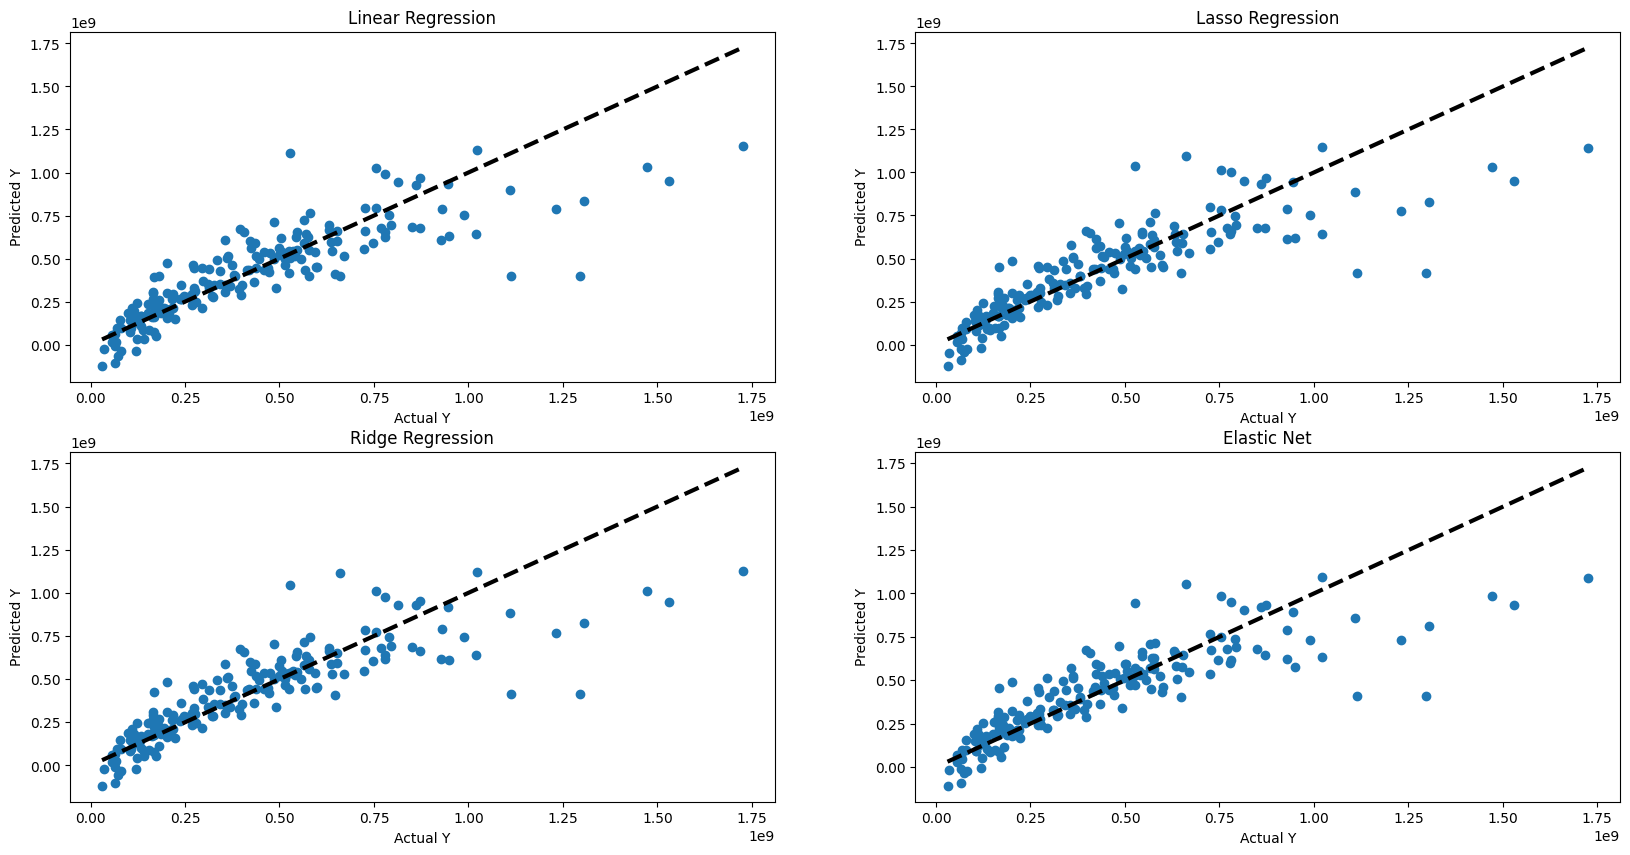

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10))
plot_model(axs[0,0],"Linear Regression", True)
plot_model(axs[0,1],"Lasso Regression", True)
plot_model(axs[1,0],"Ridge Regression", True)
plot_model(axs[1,1],"Elastic Net", True)

plt.show()